<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Material" data-toc-modified-id="Material-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Material</a></span></li><li><span><a href="#tfidf" data-toc-modified-id="tfidf-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>tfidf</a></span></li><li><span><a href="#bm25" data-toc-modified-id="bm25-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>bm25</a></span></li><li><span><a href="#bm25-vs-tfidf" data-toc-modified-id="bm25-vs-tfidf-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>bm25 vs tfidf</a></span></li></ul></div>

## Material

https://www.pinecone.io/learn/semantic-search/

## tfidf

In [7]:
import numpy as np

In [11]:
a = 'purple is the best city in the forest'.split()
b = 'there is an art to getting in your way and throwing bananas on the street is not it'.split()
c = 'it is not often you find soggy bananas on the street'.split()

docs = [a,b,c]

In [15]:
def tfidf(word, sentence, docs):
    tf = sentence.count(word) / len(sentence)
    idf = np.log10( len(docs)/sum([1 for doc in docs if word in doc]) )
    return round(tf*idf, 4)

In [20]:
tfidf('is',a, docs)

0.0

In [21]:
tfidf('forest',a, docs)

0.0596

In [23]:
vocab = set(a + b + c)

In [47]:
def build_tfidf(x, docs, vocab):
    vec = []
    for word in vocab:
        vec.append(tfidf(word,a,docs))
    return np.array(vec)

In [48]:
%timeit vec_a = build_tfidf(a, docs, vocab)

139 µs ± 1.7 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [49]:
word_to_pos = {w:i for i,w in enumerate(vocab)}

def build_tfidf_efficient(x, docs, len_vocab):
    vec = np.zeros(len_vocab)
    
    for w in x:
        vec[word_to_pos[w]] = tfidf(w, x, docs)
    return vec

In [50]:
%timeit vec_a_efficient = build_tfidf_efficient(a, docs, len(vocab))

44.3 µs ± 191 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


## bm25

In [151]:
a = "purple is the best city in the forest".split()
a2 = "purple is the best city in the purple forest".split()
a3 = "purple is the best purple city in the purple forest".split()
a10 = "purple is the best purple city in the purple purple purple purple purple purple purple purple forest".split()
b = "there is an art to getting your way and throwing bananas on to the street is not it".split()
c = "it is not often you find soggy bananas on the street".split()
d = "green should have smelled more tranquil but somehow it just tasted rotten".split()
e = "joyce enjoyed eating pancakes with ketchup".split()
f = "as the asteroid hurtled toward earth becky was upset her dentist appointment had been canceled".split()


q = 'a long blue dress' ->'a big blue dress', 'a tall blue dress',  'a tall turqoise dress'
q = 'a playstation' -> delta_minimizer*'an xbox'

q = 'computer' 



In [161]:
import numpy as np

avgdl = sum(len(sentence) for sentence in [a,b,c,d,e,f]) / len(docs)
N = len(docs)

def bm25(word, sentence, k=2, b=0.75):
    freq = sentence.count(word)  # or f(q,D) - freq of query in Doc
    tf = (freq * (k + 1)) / (freq + k * (1 - b + b * len(sentence) / avgdl))
    N_q = sum([1 for doc in docs if word in doc])  # number of docs that contain the word
    idf = np.log(((N - N_q + 0.5) / (N_q + 0.5)) + 1)
    return round(tf*idf, 4)

In [162]:
bm25('purple', a), bm25('purple', a2),  bm25('purple', a3), bm25('purple', a10)

(1.3415, 1.6303, 1.7564, 1.9696)

In [163]:
bm25('purple', b)

0.0

In [164]:
bm25('bananas', b)

0.5185

In [165]:
# c scores higher than b because len(c) < len(b)
bm25('bananas', c)

0.5997

## bm25 vs tfidf






In [ ]:
def tfidf(word, sentence, docs):
    tf = sentence.count(word) / len(sentence)
    idf = np.log10( len(docs)/sum([1 for doc in docs if word in doc]) )
    return round(tf*idf, 4)

In [185]:
def tfidf_viz(w, s, n_t):
    tf = w / s
    idf = np.log10(len(docs) / n_t)
    return tf, idf

def bm25_viz(w, s, N_t, k=2.2, b=0.75):
    tf = (w * (k + 1)) / (w + k * (1 - b + b * (s / avgdl)))
    idf = np.log10(((N - N_t + 0.5) / (N_t + 0.5)) + 1)
    return tf, idf

tfidf_scores = []
bm25_scores = []

for i in range(20):
    tfidf_scores.append(tfidf_viz(i, avgdl, 2))
    bm25_scores.append(bm25_viz(i, avgdl, 2))
    
tfidf_tf  = [x[0] for x in tfidf_scores]
tfidf_idf = [x[1] for x in tfidf_scores]

bm25_tf  = [x[0] for x in bm25_scores]
bm25_idf = [x[1] for x in bm25_scores]

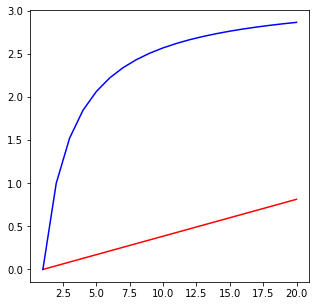

In [192]:
plt.figure(figsize=(5, 5))

plt.plot(list(range(1, len(tfidf_tf) + 1)), tfidf_tf, color='red')
plt.plot(list(range(1, len(bm25_tf) + 1)), bm25_tf, color='blue')

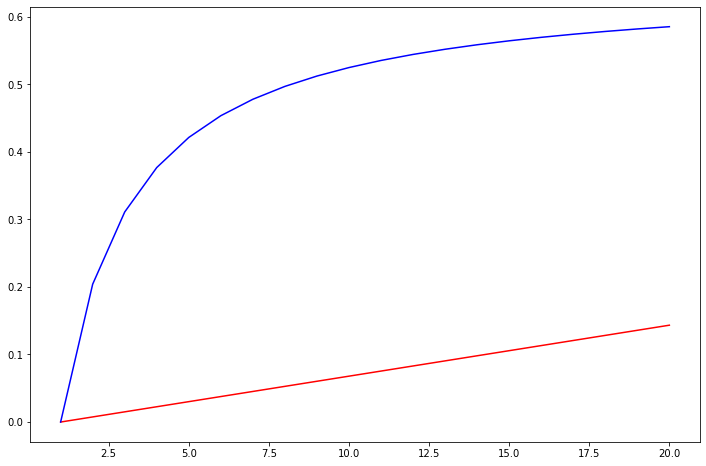

In [193]:
# calculate full tf*idf
tfidf_tfidf = [tf * idf for tf, idf in zip(tfidf_tf, tfidf_idf)]
bm25_tfidf  = [tf * idf for tf, idf in zip(bm25_tf, bm25_idf)]

plt.figure(figsize=(12, 8))

plt.plot(list(range(1, len(tfidf_tfidf) + 1)), tfidf_tfidf, 'red')
plt.plot(list(range(1, len(bm25_tfidf) + 1)), bm25_tfidf, 'blue')